## Engel-Granger Cointegration Test

The EG test can help statistically determine if 2 series have a long-run relationship. The EG test has 2 steps. You run an OLS regression, in levels and then perform a unit root test on the residuals. The premise of cointegration is that 2 non-stationary series may share a common long-run relationship. More specifically, a linear combination of 2 non-stationary variables may be stationary. 

In [1]:
import Haver
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str
#from statsmodels.tsa.api import VECM
from statsmodels.tsa.api import coint
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox as lb

In [2]:
Haver.path()

'R:\\\\'

In [4]:
Haver.path('C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS\\')

In [5]:
Haver.path()

'C:\\Users\\RNAMG01\\Desktop\\python haver training\\US1PLUS'

In [6]:
df=Haver.data(['pcu','pa'], 'us1plus', dates=True)



In [7]:
df=df.dropna()

In [8]:
df.head()

,pcu,pa
1947-01-31,21.48,24.5
1947-02-28,21.62,24.7
1947-03-31,22.00,25.3
1947-04-30,22.00,25.1
1947-05-31,21.95,25.0


In [9]:
df.tail()

,pcu,pa
2018-07-31,251.286,204.3
2018-08-31,251.846,203.0
2018-09-30,251.994,203.2
2018-10-31,252.827,204.3
2018-11-30,252.876,201.5


If you think 2 series might have a long-run relationship it makes sense to take a quick look at their behaviour on a graph.

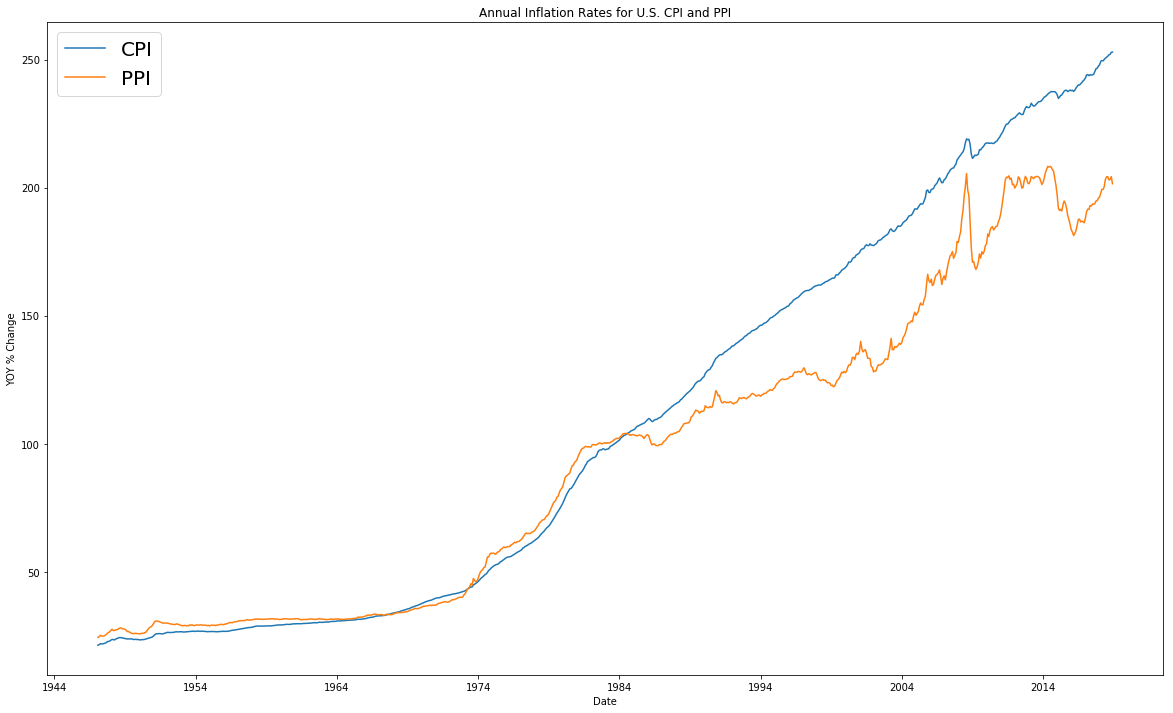

In [10]:
fig = plt.figure(figsize=(20,12))
fig= plt.plot(df, label=['CPI', 'PPI'])
plt.xlabel("Date")
plt.ylabel("YOY % Change")
plt.title('Annual Inflation Rates for U.S. CPI and PPI')
plt.legend(['CPI','PPI'], fontsize="20")
plt.show()

You have learned other techniques to test for stationarity. Both the ACF and Q-Ljung Box test can help.

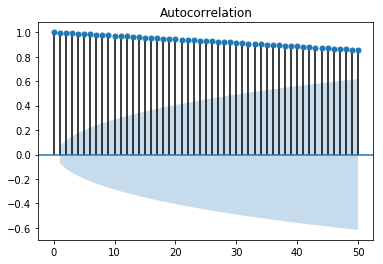

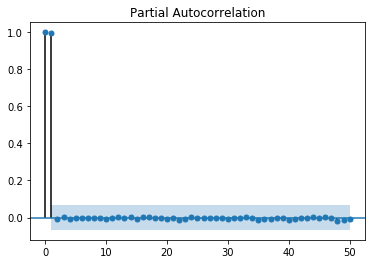

In [11]:
x=plot_acf(df['pcu'], lags=50)
y=plot_pacf(df['pcu'], lags=50)

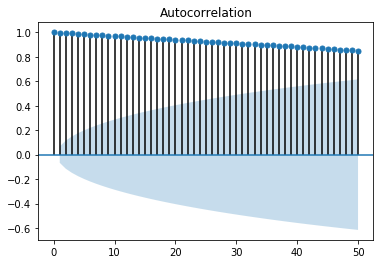

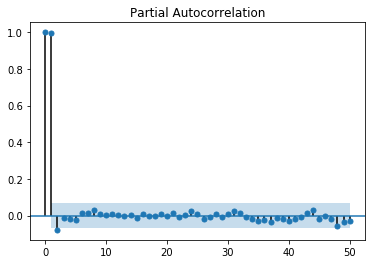

In [12]:
x=plot_acf(df['pa'], lags=50)
y=plot_pacf(df['pa'], lags=50)

In [13]:
lb(df['pcu'], lags=25, boxpierce=False)

(array([  861.05086185,  1718.11950643,  2571.23319148,  3420.37635498,
         4265.55128223,  5106.76089858,  5944.00406535,  6777.28923748,
         7606.63441166,  8432.01073881,  9253.41517587, 10070.89761187,
        10884.4715265 , 11694.15875067, 12499.94180062, 13301.85880179,
        14099.94006067, 14894.1751121 , 15684.55347968, 16471.04523823,
        17253.64513924, 18032.31189342, 18807.02479817, 19577.82440634,
        20344.72559839]),
 array([2.878086e-189, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000, 0.000000e+000, 0.000000e+000, 0.000000e+000,
        0.000000e+000]))

In [14]:
lb(df['pa'], lags=25, boxpierce=False)

(array([  861.0054619 ,  1717.56830584,  2569.5849484 ,  3416.96227759,
         4259.56684898,  5097.46499276,  5930.7771085 ,  6759.71926045,
         7584.39713236,  8404.8674692 ,  9221.20188977, 10033.44293269,
        10841.60818555, 11645.73433547, 12445.77695389, 13241.789074  ,
        14033.77014871, 14821.72925133, 15605.71422307, 16385.72470341,
        17161.84171368, 17934.04353751, 18702.34948114, 19466.9111091 ,
        20227.80966635]),
 array([2.9442431e-189, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000, 0.0000000e+000, 0.0000000e+000, 0.0000000e+000,
        0.0000000e+000]))

You have now looked at the time series graphically, and tested the autoregressive sructure of the data. We can now formally test for non-stationarity using a unit root test.

In [15]:
result = adfuller(df['pcu'], autolag="AIC")


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 1.921065
p-value: 0.998561
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


In [16]:
result = adfuller(df['pa'], autolag="AIC")


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.695251
p-value: 0.989743
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569


If you conclude that both series have unit roots (are non-stationary), you can test for cointegration statistically using the Engel-Granger Cointegration test.

In [17]:
result = sm.ols(formula="df['pcu'] ~ df['pa']", data=df).fit()

In [18]:
print(result.params)

Intercept   -12.167145
df['pa']      1.273487
dtype: float64


In [19]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              df['pcu']   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 4.636e+04
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        12:00:11   Log-Likelihood:                -3236.0
No. Observations:                 863   AIC:                             6476.
Df Residuals:                     861   BIC:                             6486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.1671      0.659    -18.470      0.0

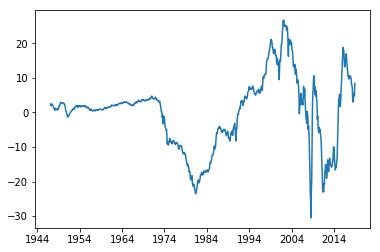

In [20]:
resid=result.resid
plt.plot(resid)

In [21]:
result = adfuller(resid, autolag="AIC")


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.214631
p-value: 0.200978
Critical Values:
	1%: -3.438
	5%: -2.865
	10%: -2.569
